In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

2.

---

(a) Find a 95% confidence interval for the slope of the regression model, $\beta_1$. On the basis of this confidence interval decide whether there is evidence of a significant negative linear association.

In [2]:
indicators = pd.read_table("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Homework/indicators2.txt", sep='\t')

In [56]:
indicators2 = indicators[['PriceChange','LoanPaymentsOverdue']]
indicators2.head()

,PriceChange,LoanPaymentsOverdue
Atlanta,1.2,4.55
Boston,-3.4,3.31
Chicago,-0.9,2.99
Dallas,0.8,4.26
Denver,-0.7,3.56


In [4]:
indicators2['PriceChange'].mean()

-3.427777777777778

In [5]:
indicators2['LoanPaymentsOverdue'].mean()

3.532222222222222

In [6]:
len(indicators2.index)

18

In [96]:
SXX_hw2_2 = ((indicators2['LoanPaymentsOverdue'] - indicators2['LoanPaymentsOverdue'].mean())**2).sum()
SXX_hw2_2

19.16011111111111

In [97]:
SYY_hw2_2 = ((indicators2['PriceChange'] - indicators2['PriceChange'].mean())**2).sum()
SYY_hw2_2

347.0161111111111

In [98]:
SXY_hw2_2 = ((indicators2['LoanPaymentsOverdue'] 
        - indicators2['LoanPaymentsOverdue'].mean())*(indicators2['PriceChange'] 
                                                      - indicators2['PriceChange'].mean())).sum()
SXY_hw2_2

-43.0818888888889

In [99]:
beta1_hw2_2 = SXY_hw2_2 / SXX_hw2_2
beta1_hw2_2

-2.248519783578152

In [100]:
beta0_hw2_2 = indicators2['PriceChange'].mean() - beta1_hw2_2 * indicators2['LoanPaymentsOverdue'].mean()
beta0_hw2_2

4.514493768883272

In [101]:
s_hw2_2 = (((indicators2['PriceChange'] - beta0_hw2_2 - beta1_hw2_2 * indicators2['LoanPaymentsOverdue'])**2).sum() / (len(indicators2.index)-2))**(1/2)
s_hw2_2

3.953998226720397

In [64]:
st.t.ppf(0.975, len(indicators2.index)-2)

2.1199052992210112

In [104]:
beta1_hw2_2 - st.t.ppf(0.975, len(indicators2.index)-2) * s_hw2_2 / (SXX_hw2_2)**(1/2)

-4.163454263593569

In [105]:
beta1_hw2_2 + st.t.ppf(0.975, len(indicators2.index)-2) * s_hw2_2 / (SXX_hw2_2)**(1/2)

-0.3335853035627354

Thus, the 95% confidence interval is (-4.163454263593569, -0.3335853035627354).

In [106]:
Estimate4_hw2_2 = beta0_hw2_2 + beta1_hw2_2 * 4
Estimate4_hw2_2

-4.479585365429337

In [107]:
lm_model_hw2_2 = smf.ols(formula='PriceChange ~ LoanPaymentsOverdue', data=indicators2).fit()

In [108]:
lm_model_hw2_2.summary()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PriceChange   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     6.196
Date:                Sat, 21 Jan 2023   Prob (F-statistic):             0.0242
Time:                        23:16:51   Log-Likelihood:                -49.226
No. Observations:                  18   AIC:                             102.5
Df Residuals:                      16   BIC:                             104.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.5145      3.324      1.358      0.193      -2.532      11.561
LoanPaymentsOverdue    -2.2485      0.903     -2.489      0.024      -4.163      -0.334
==============================================================================
Omnibus:                        2.121   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.403
Skew:                           0.448   Prob(JB):                        0.496
Kurtosis:                       1.966   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

(b) Use the fitted regression model to estimate $E(Y|X=4)$. Find a 95% confidence interval for $E(Y|X=4)$. Is 0% a feasible value for $E(Y|X=4)$? Give a reason to support your answer.

In [109]:
lm_model_hw2_2.params

Intercept              4.514494
LoanPaymentsOverdue   -2.248520
dtype: float64

In [22]:
lm_model_hw2_2.predict(DataFrame({"LoanPaymentsOverdue": [4]}))

0   -4.479585
dtype: float64

In [110]:
lm_model_hw2_2.bse.LoanPaymentsOverdue

0.903311332218041

In [111]:
lm_model_hw2_2.predict(DataFrame({"LoanPaymentsOverdue": [4]})) - st.t.ppf(0.975, len(indicators2.index)-2) * s_hw2_2 * ((1/len(indicators2.index) + (4 - indicators2['LoanPaymentsOverdue'].mean())**2 / SXX_hw2_2))**(1/2)

0   -6.648849
dtype: float64

In [112]:
lm_model_hw2_2.predict(DataFrame({"LoanPaymentsOverdue": [4]})) + st.t.ppf(0.975, len(indicators2.index)-2) * s_hw2_2 * ((1/len(indicators2.index) + (4 - indicators2['LoanPaymentsOverdue'].mean())**2 / SXX_hw2_2))**(1/2)


0   -2.310322
dtype: float64

Thus, the 95% confidence interval for beta1 where x=4 is (-6.39386, -2.565311).  
Therefore, 0% = 0.00 is not a feasible value for E(Y|X=4).

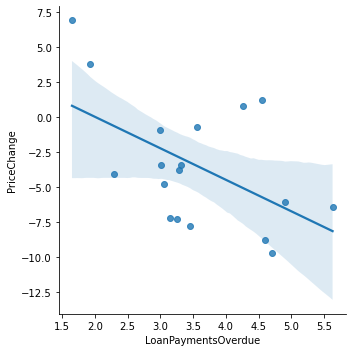

In [114]:
sns.lmplot(x='LoanPaymentsOverdue', y='PriceChange', data=indicators)

---

3.

(a) Find a 95% confidence interval for the start-up time, i.e. $\beta_0$.

In [120]:
invoices = pd.read_table("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Homework/invoices.txt", sep="\t")

In [121]:
invoices.head()

,Day,Invoices,Time
0,1,149,2.1
1,2,60,1.8
2,3,188,2.3
3,4,23,0.8
4,5,201,2.7


In [122]:
lm_model_hw2_3 = smf.ols('Time~Invoices', data=invoices).fit()

In [123]:
lm_model_hw2_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           5.17e-14
Time:                        23:19:01   Log-Likelihood:                -8.2528
No. Observations:                  30   AIC:                             20.51
Df Residuals:                      28   BIC:                             23.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6417      0.122      5.248      0.000       0.391       0.892
Invoices       0.0113      0.001     13.797      0.000       0.010       0.013
==============================================================================
Omnibus:                        2.815   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.341
Skew:                          -0.042   Prob(JB):                        0.511
Kurtosis:                       1.968   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Thus, the 95% confidence interval for beta0 = (0.391, 0.892).

---

(b) Suppose that $\beta_1 = 0.01$. Test the null hypothesis $H_0 : \beta_1 = 0.01$ against a two-sided alternative.

In [124]:
lm_model_hw2_3.HC3_se.Invoices

0.0007872634462536831

In [125]:
(lm_model_hw2_3.params.Invoices - 0.01) / lm_model_hw2_3.HC3_se.Invoices

1.640675810336413

In [126]:
st.t.ppf(0.975, len(invoices.index)-2)

2.048407141795244

Thus, 1.64 < 2.04, so that we cannot reject the null.  
Therefore, we cannot say that $\beta_1 = 0.01$.

---

(c) Find a point estimate and a 95% prediction interval for the time taken to process 130 invoices.

In [127]:
lm_model_hw2_3.predict(DataFrame({"Invoices":[130]}))

0    2.109624
dtype: float64

In [128]:
SXX_hw2_3 =((invoices['Invoices'] - invoices['Invoices'].mean())**2).sum()
SXX_hw2_3

162366.96666666662

In [129]:
s_hw2_3 = (sum((lm_model_hw2_3.resid)**2) / (len(invoices.index)-2))**(1/2)
s_hw2_3

0.3297733332485559

In [130]:
lm_model_hw2_3.resid.std() # a little bit different from residual standard error.

0.3240377073104922

In [132]:
se130_hw2_3 = s_hw2_3 * (1 + (1/len(invoices.index)) + (((130 - invoices['Invoices'].mean())**2) / SXX_hw2_3))**(1/2)
se130_hw2_3

0.3352245025503466

In [133]:
print(lm_model_hw2_3.predict(DataFrame({"Invoices":[130]})) - st.t.ppf(0.975, len(invoices.index)-2) * se130_hw2_3)
print(lm_model_hw2_3.predict(DataFrame({"Invoices":[130]})) + st.t.ppf(0.975, len(invoices.index)-2) * se130_hw2_3)

0    1.422947
dtype: float64
0    2.7963
dtype: float64


Thus, the point estimate is 2.109624, and 95% prediction interval is (1.422947, 2.7963).

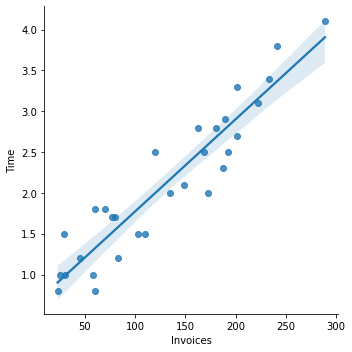

In [134]:
sns.lmplot(x='Invoices', y='Time', data=invoices)